<a href="https://colab.research.google.com/github/matiasjara987/Libros-Colab/blob/main/Taller_sistema_inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones Binarias mediante SVC

## Importación de Librerías



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_fscore_support,
    precision_recall_curve,
    roc_curve,
    auc
)


 ## Descripción del Problema

'''
El objetivo de este proyecto es predecir el género de un nuevo miembro del gimnasio basado en características
como edad, peso, altura, etc. Este es un problema de clasificación binaria donde las dos clases son:
Hombre o Mujer.
'''


##Carga dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Instancia de trabajo mediante Drive
data = pd.read_csv('/content/drive/MyDrive/gym_members_exercise_tracking.csv')

In [ ]:
# Traducción de columnas al español
column_translations = {
    "Age": "Edad",
    "Gender": "Género",
    "Weight (kg)": "Peso (kg)",
    "Height (m)": "Altura (m)",
    "Max_BPM": "FC_Máxima",
    "Avg_BPM": "FC_Promedio",
    "Resting_BPM": "FC_Reposo",
    "Session_Duration (hours)": "Duración_Sesión (horas)",
    "Calories_Burned": "Calorías_Quemadas",
    "Workout_Type": "Tipo_Ejercicio",
    "Fat_Percentage": "Porcentaje_Grasa",
    "Water_Intake (liters)": "Ingesta_Agua (litros)",
    "Workout_Frequency (days/week)": "Frecuencia_Ejercicio (días/semana)",
    "Experience_Level": "Nivel_Experiencia",
    "BMI": "IMC"
}
data.rename(columns=column_translations, inplace=True)

##Detalles del dataset

In [ ]:
# Inspección inicial
print("Primeras filas del dataset:")
data.head()

Primeras filas del dataset:


,Edad,Género,Peso (kg),Altura (m),FC_Máxima,FC_Promedio,FC_Reposo,Duración_Sesión (horas),Calorías_Quemadas,Tipo_Ejercicio,Porcentaje_Grasa,Ingesta_Agua (litros),Frecuencia_Ejercicio (días/semana),Nivel_Experiencia,IMC
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
print("\nResumen del dataset:")
data.info()

# Revisar valores nulos
print("\nValores nulos por columna:")
data.isnull().sum()



Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Edad                                973 non-null    int64  
 1   Género                              973 non-null    object 
 2   Peso (kg)                           973 non-null    float64
 3   Altura (m)                          973 non-null    float64
 4   FC_Máxima                           973 non-null    int64  
 5   FC_Promedio                         973 non-null    int64  
 6   FC_Reposo                           973 non-null    int64  
 7   Duración_Sesión (horas)             973 non-null    float64
 8   Calorías_Quemadas                   973 non-null    float64
 9   Tipo_Ejercicio                      973 non-null    object 
 10  Porcentaje_Grasa                    973 non-null    float64
 11  Ingesta_Agua (litros)  

,0
Edad,0
Género,0
Peso (kg),0
Altura (m),0
FC_Máxima,0
FC_Promedio,0
FC_Reposo,0
Duración_Sesión (horas),0
Calorías_Quemadas,0
Tipo_Ejercicio,0


In [ ]:
print("\nEstadísticas descriptivas:")
data.describe()


Estadísticas descriptivas:


,Edad,Peso (kg),Altura (m),FC_Máxima,FC_Promedio,FC_Reposo,Duración_Sesión (horas),Calorías_Quemadas,Porcentaje_Grasa,Ingesta_Agua (litros),Frecuencia_Ejercicio (días/semana),Nivel_Experiencia,IMC
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


## Algoritmo Seleccionado: Entrenamiento y evaluación

## Descripción del algoritmo seleccionado (SVM)

'''
El algoritmo seleccionado para este proyecto es el Support Vector Machine (SVM), que es un
algoritmo de clasificación supervisada que busca el mejor margen de separación entre dos clases.
Se eligió SVM debido a su eficacia en problemas de clasificación binaria, especialmente cuando los
datos no son linealmente separables, gracias al uso del kernel RBF.
'''

##Preprocesamiento de datos

In [ ]:
data = data.drop(columns=['Tipo_Ejercicio'])
data['Género'] = data['Género'].map({'Male': 0, 'Female': 1})

X = data.drop('Género', axis=1)
y = data['Género']

# Verificar balance de clases
print("\nDistribución de clases:")
print(y.value_counts(normalize=True))
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Distribución de clases:
Género
0    0.52518
1    0.47482
Name: proportion, dtype: float64


# Entrenamiento y evaluación SVM


--- Entrenando SVM con kernel: linear ---
Exactitud (Accuracy): 0.8390
Precisión: 0.8151, Recall: 0.8561, F1-Score: 0.8351


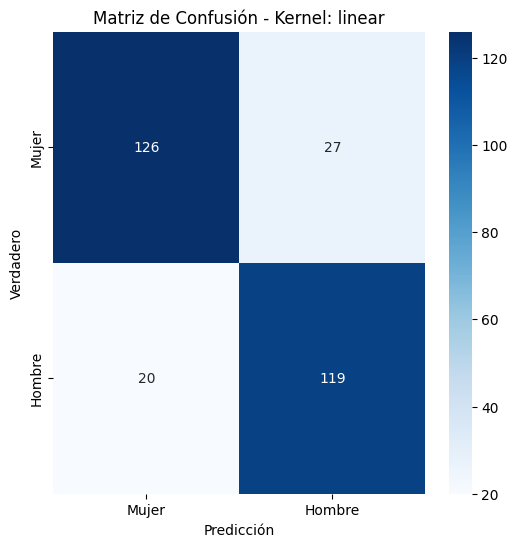


--- Entrenando SVM con kernel: poly ---
Exactitud (Accuracy): 0.8082
Precisión: 0.7677, Recall: 0.8561, F1-Score: 0.8095


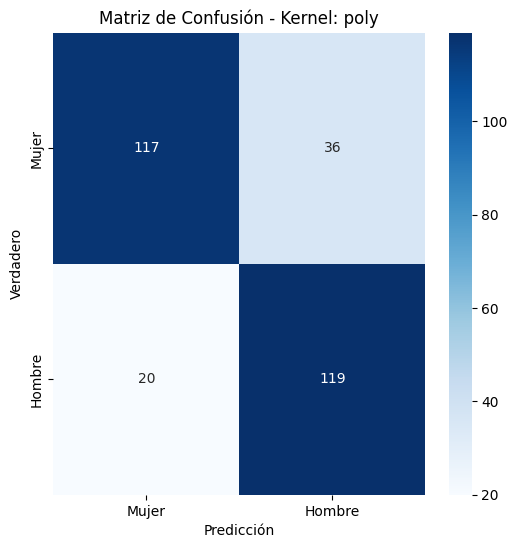


--- Entrenando SVM con kernel: sigmoid ---
Exactitud (Accuracy): 0.8048
Precisión: 0.8015, Recall: 0.7842, F1-Score: 0.7927


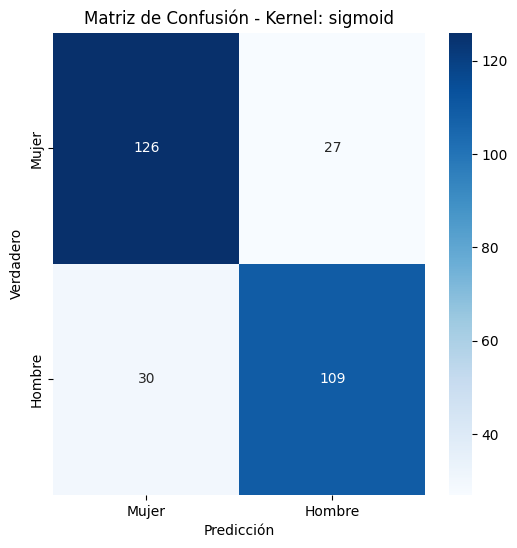


--- Entrenando SVM con kernel: rbf ---
Exactitud (Accuracy): 0.8938
Precisión: 0.8293, Recall: 0.9784, F1-Score: 0.8977


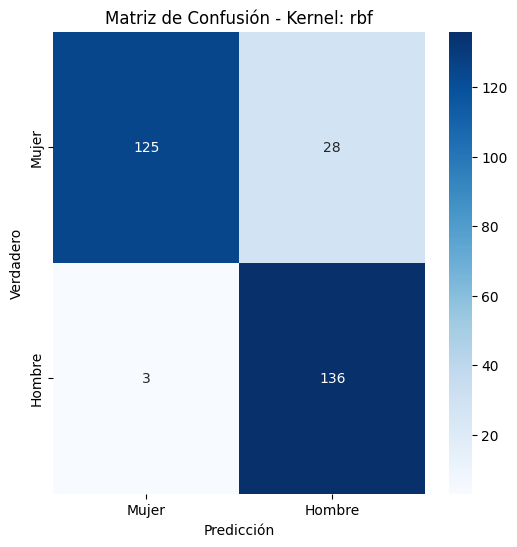

In [ ]:
kernels = ['linear', 'poly', 'sigmoid']

results = {}

for kernel in kernels:
    print(f"\n--- Entrenando SVM con kernel: {kernel} ---")


    svm_model = SVC(kernel=kernel,
                    C=0.1,
                    random_state=42,
                    max_iter=1000)

    svm_model.fit(X_train_scaled, y_train)

    y_pred = svm_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    # Almacenar resultados
    results[kernel] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # Mostrar métricas
    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    # Visualizar matriz de confusión
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Mujer', 'Hombre'], yticklabels=['Mujer', 'Hombre'])
    plt.title(f'Matriz de Confusión - Kernel: {kernel}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()



--- Evaluando SVM con kernel: linear ---

--- Evaluando SVM con kernel: poly ---

--- Evaluando SVM con kernel: sigmoid ---


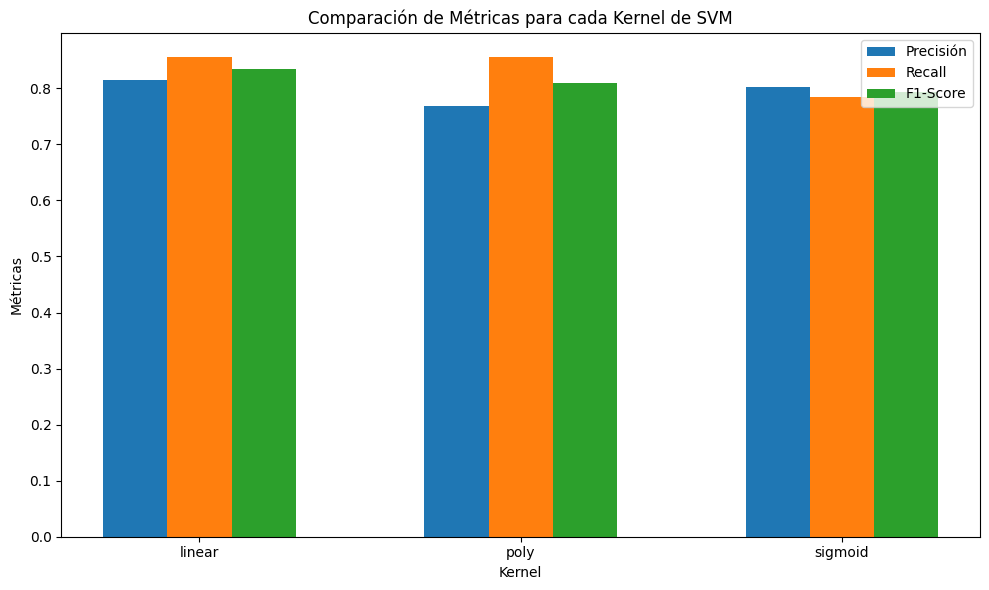

In [ ]:
# Paso 7: Comparación de métricas entre varios kernels
kernels = ['linear', 'poly', 'sigmoid']
precision_list = []
recall_list = []
f1_score_list = []

# Evaluar el modelo con cada kernel
for kernel in kernels:
    print(f"\n--- Evaluando SVM con kernel: {kernel} ---")

    # Entrenar el modelo con el kernel actual
    svm_model = SVC(kernel=kernel, random_state=42, C=0.1, max_iter=1000)
    svm_model.fit(X_train_scaled, y_train)

    # Realizar las predicciones
    y_pred = svm_model.predict(X_test_scaled)

    # Calcular precisión, recall y F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    # Almacenar las métricas
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

# Graficar las métricas comparativas
bar_width = 0.2
index = np.arange(len(kernels))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, precision_list, bar_width, label='Precisión')
bar2 = ax.bar(index + bar_width, recall_list, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_score_list, bar_width, label='F1-Score')

ax.set_xlabel('Kernel')
ax.set_ylabel('Métricas')
ax.set_title('Comparación de Métricas para cada Kernel de SVM')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(kernels)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

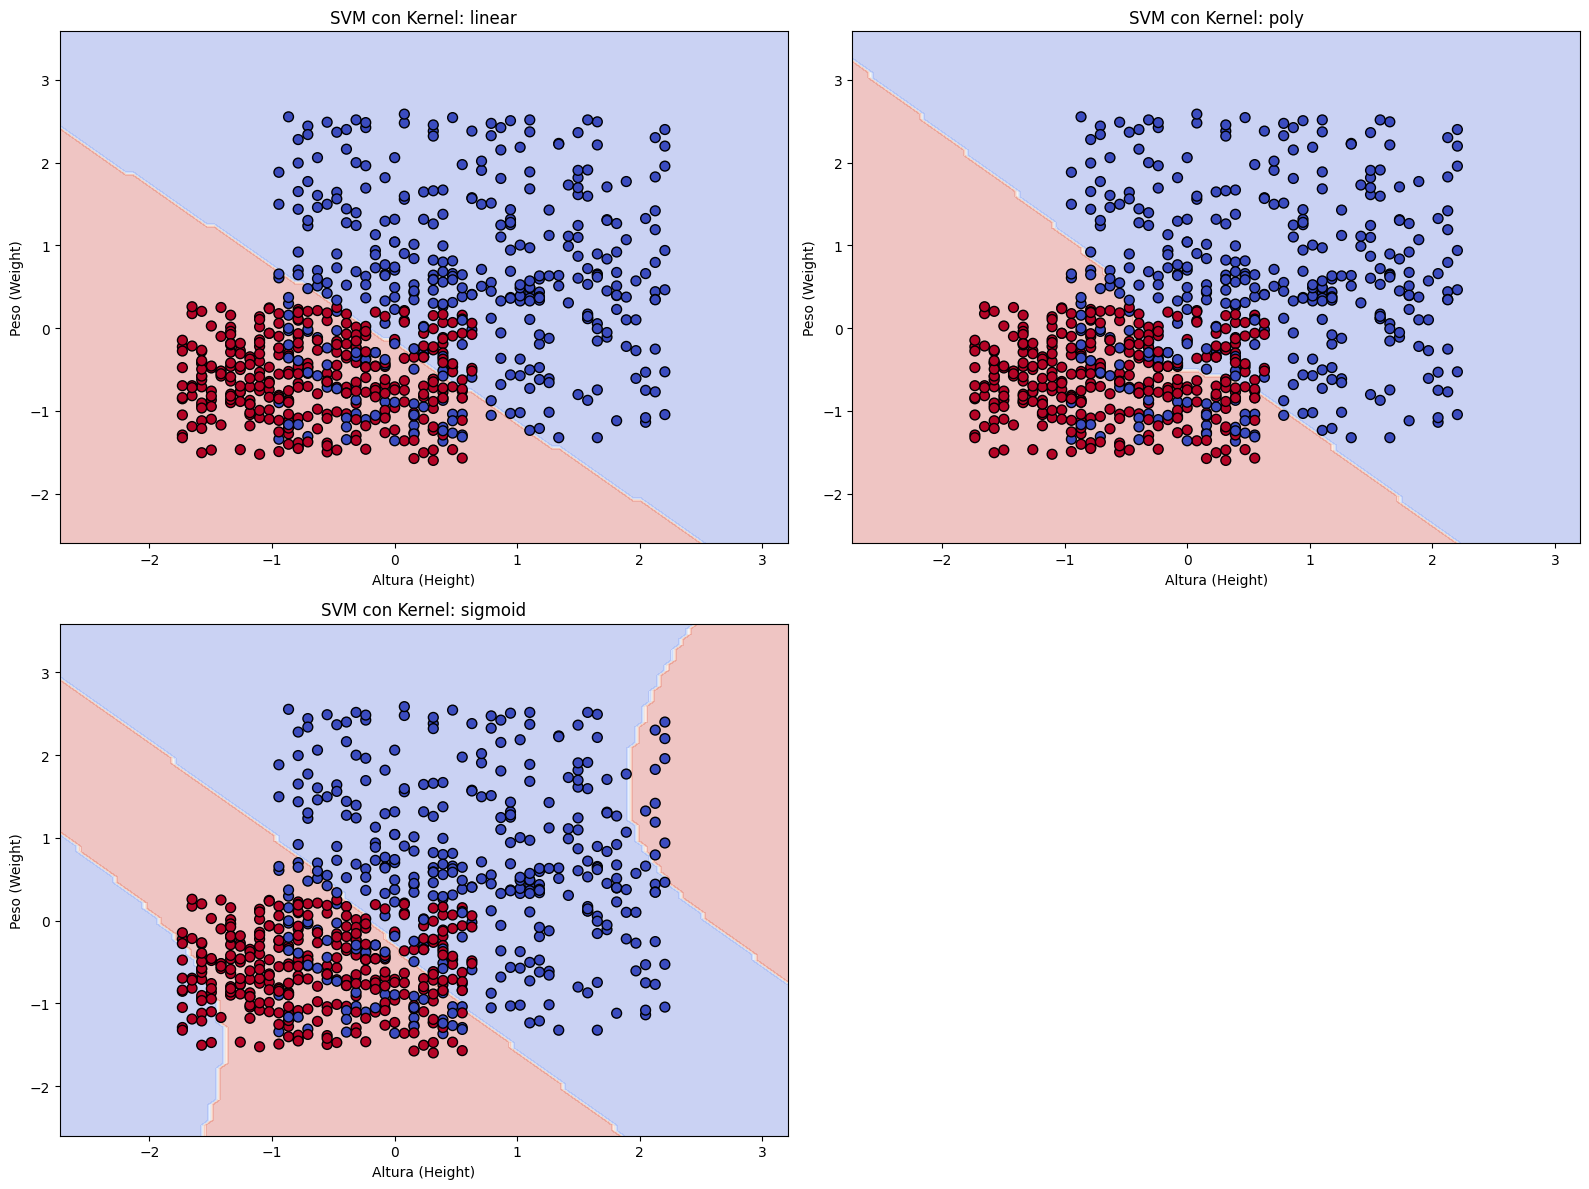

In [ ]:
# 3. Visualización de fronteras de decisión
plt.figure(figsize=(16, 12))
X = data[['Altura (m)', 'Peso (kg)']]  # Ejemplo con 'height' y 'weight' como características
y = data['Género']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar los datos para mejorar el desempeño del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i, kernel in enumerate(kernels):
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Crear una malla de puntos para predecir en el espacio 2D
    xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 100),
                         np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 100))

    # Predecir la clase para cada punto de la malla
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Crear una subgráfica para cada kernel
    plt.subplot(2, 2, i + 1)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolors='k')
    plt.title(f"SVM con Kernel: {kernel}")
    plt.xlabel("Altura (Height)")
    plt.ylabel("Peso (Weight)")

plt.tight_layout()
plt.show()



--- Evaluando SVM con kernel: linear ---


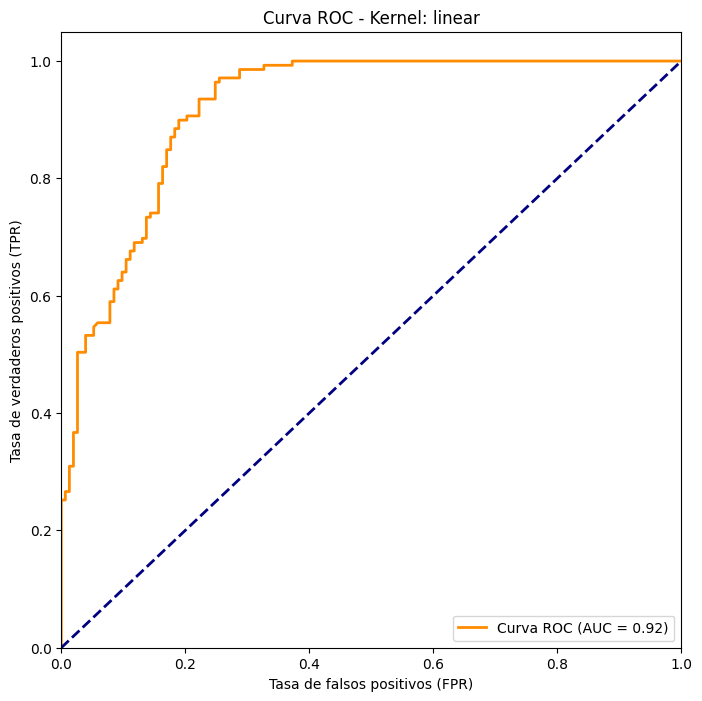

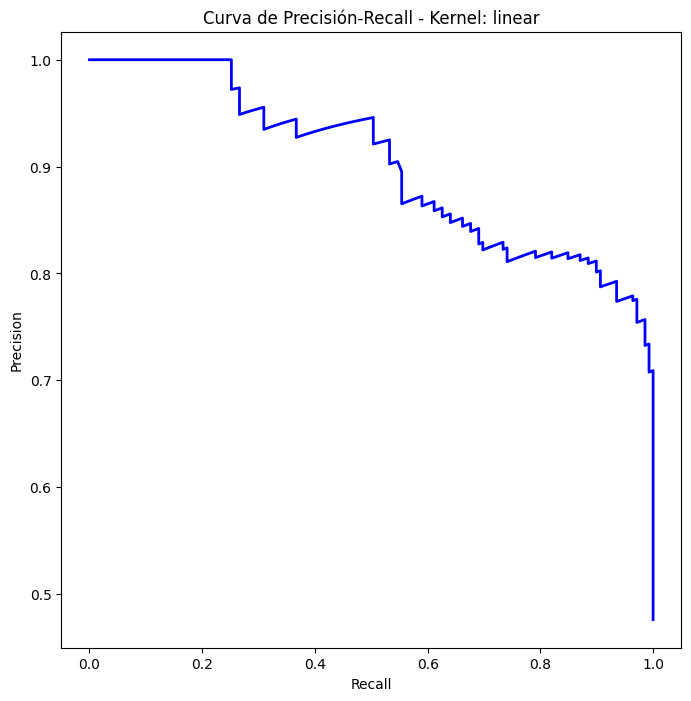


--- Evaluando SVM con kernel: poly ---


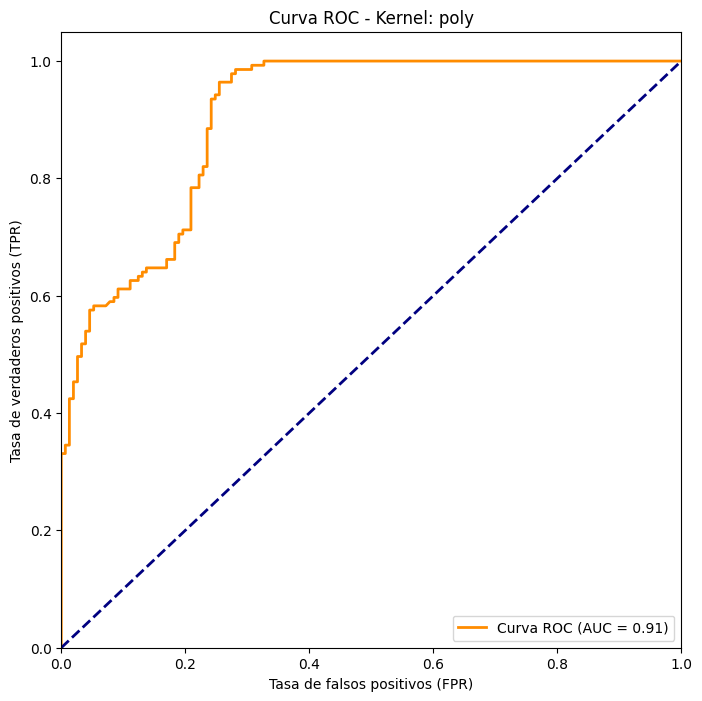

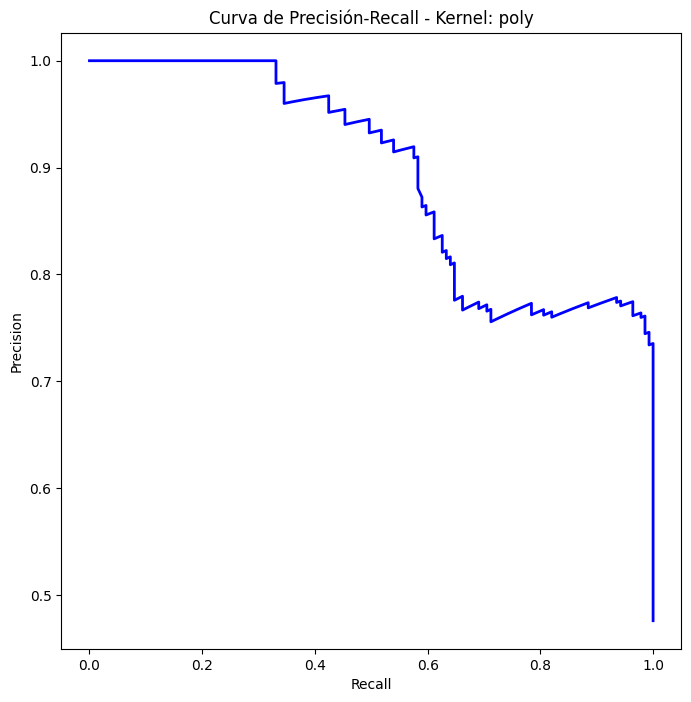


--- Evaluando SVM con kernel: sigmoid ---


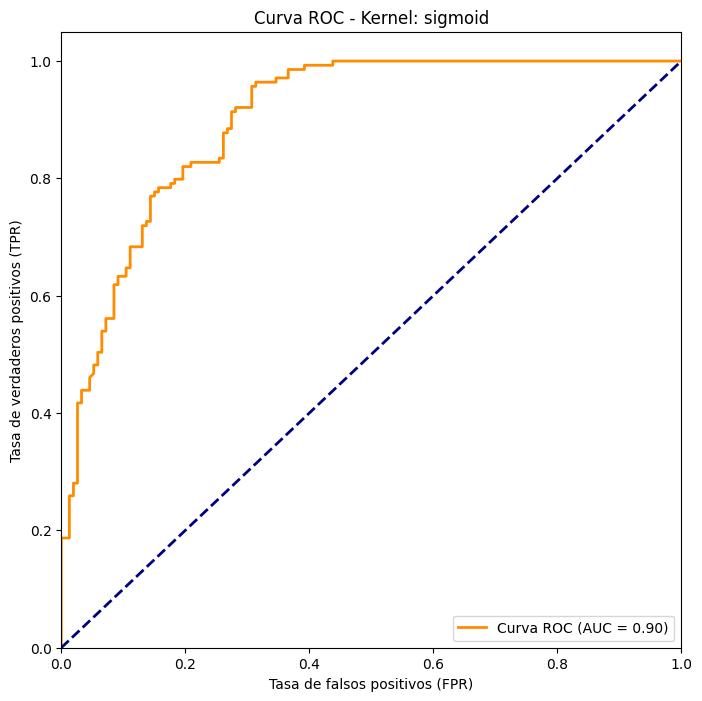

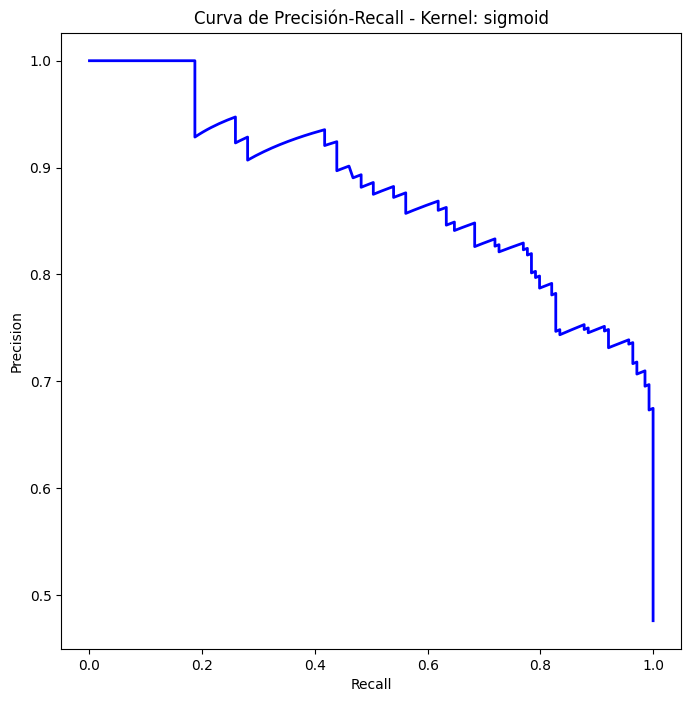

In [ ]:
# 4. Curvas de rendimiento
for kernel in kernels:
    print(f"\n--- Evaluando SVM con kernel: {kernel} ---")

    # Instanciar y entrenar el modelo SVM
    svm_model = SVC(kernel=kernel,         # Ahora usamos la variable 'kernel' que itera
                    C=0.1,               # Valor bajo para la regularización (C)
                    random_state=42,     # Fijamos la semilla para hacer el proceso reproducible
                    max_iter=1000)       # Máximo de 1000 iteraciones para el entrenamiento

    svm_model.fit(X_train_scaled, y_train)

    # Realizar predicciones
    y_pred = svm_model.predict(X_test_scaled)

    # Obtener probabilidades de predicción (no solo clases)
    y_pred_prob = svm_model.decision_function(X_test_scaled)

    # Calcular los valores de la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calcular el AUC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos (FPR)')
    plt.ylabel('Tasa de verdaderos positivos (TPR)')
    plt.title(f'Curva ROC - Kernel: {kernel}')
    plt.legend(loc='lower right')
    plt.show()

    # Obtener valores de precisión y recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    # Graficar la curva de precisión-recall
    plt.figure(figsize=(8,8))
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Curva de Precisión-Recall - Kernel: {kernel}')
    plt.show()



--- Evaluando SVM con kernel: linear ---

--- Evaluando SVM con kernel: poly ---

--- Evaluando SVM con kernel: sigmoid ---


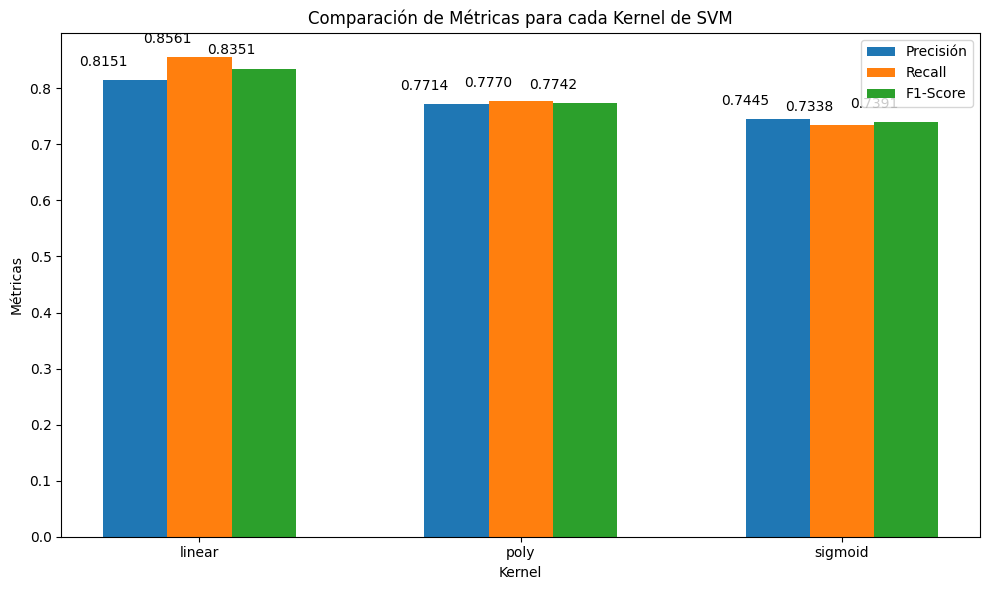

In [ ]:
# 5. Comparación de métricas
precision_list = []
recall_list = []
f1_score_list = []

for kernel in kernels:
    print(f"\n--- Evaluando SVM con kernel: {kernel} ---")

    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    y_pred = svm_model.predict(X_test_scaled)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

# Graficar las métricas
bar_width = 0.2
index = np.arange(len(kernels))

fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras para cada métrica
bar1 = ax.bar(index, precision_list, bar_width, label='Precisión')
bar2 = ax.bar(index + bar_width, recall_list, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_score_list, bar_width, label='F1-Score')

# Añadir los valores encima de las barras
for i, (precision, recall, f1) in enumerate(zip(precision_list, recall_list, f1_score_list)):
    # Precisión
    ax.text(index[i] - bar_width / 2, precision + 0.02, f'{precision:.4f}', ha='center', va='bottom')
    # Recall
    ax.text(index[i] + bar_width / 2, recall + 0.02, f'{recall:.4f}', ha='center', va='bottom')
    # F1-Score
    ax.text(index[i] + bar_width * 1.5, f1 + 0.02, f'{f1:.4f}', ha='center', va='bottom')

# Configuración del gráfico
ax.set_xlabel('Kernel')
ax.set_ylabel('Métricas')
ax.set_title('Comparación de Métricas para cada Kernel de SVM')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(kernels)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Gráficos

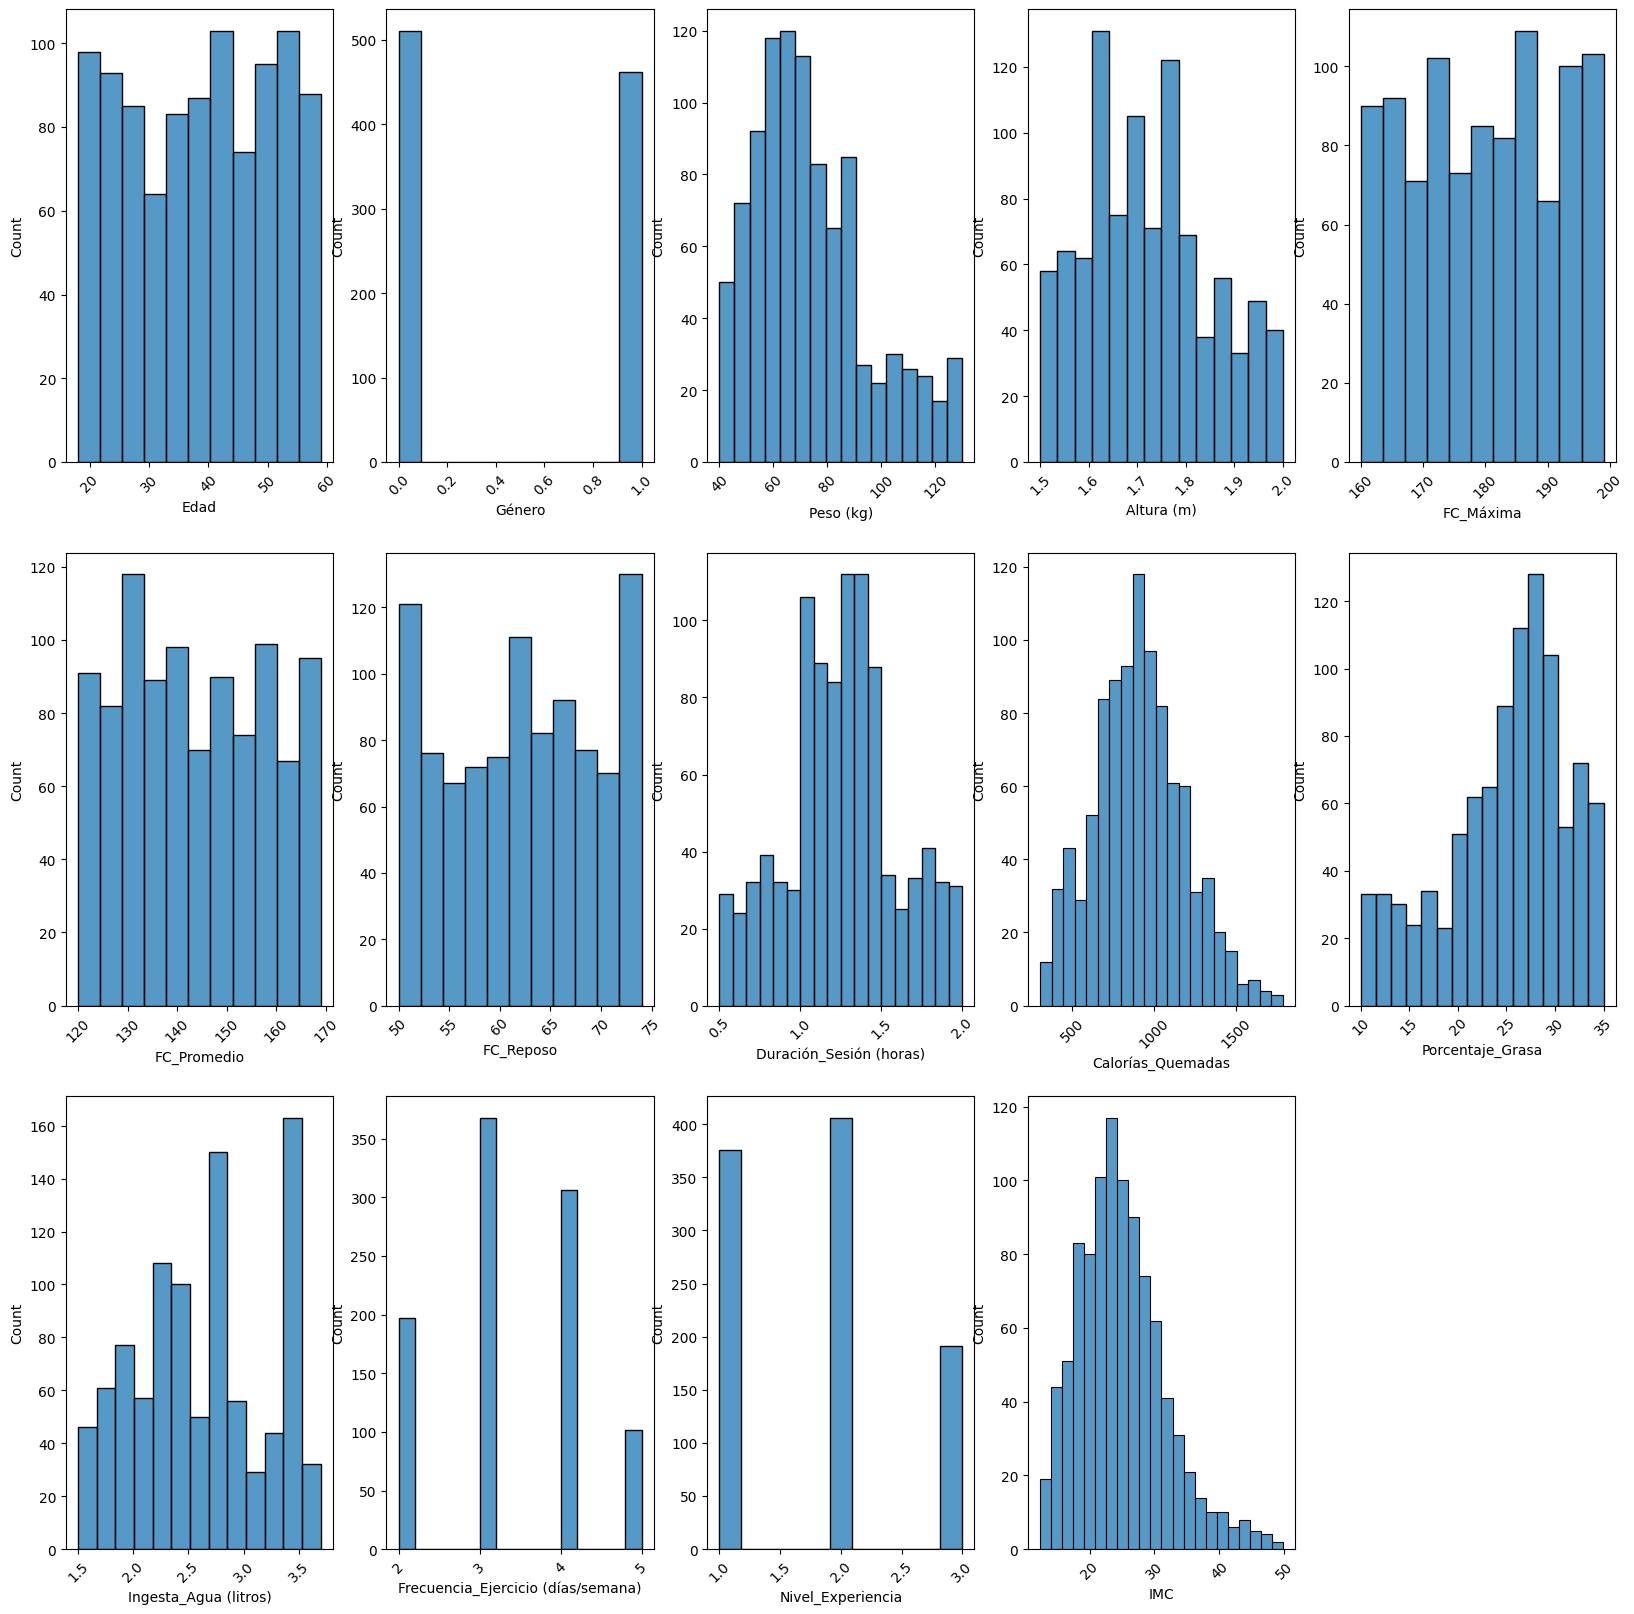

In [ ]:
plt.figure(figsize = (20, 20))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(x = data[col])
    plt.xticks(rotation = 45)
    plt.plot()